## 데이터 확인

In [1]:
import pandas as pd
import openpyxl
import os

activecop = pd.read_excel("C:\\Users\\Yeji\\Desktop\\취준\\넘블챌린지\\넘블 챌린지 데이터\\액티브 중소법인 재무보유.xlsx")
closecop = pd.read_excel("C:\\Users\\Yeji\\Desktop\\취준\\넘블챌린지\\넘블 챌린지 데이터\\휴폐업 중소법인 재무보유.xlsx")

#activecop.head()
#closecop.head()

In [2]:
import pandas as pd
finance = pd.read_csv("C:\\Users\\Yeji\\Desktop\\취준\\넘블챌린지\\넘블 챌린지 데이터\\재무데이터_피처생성추가_결측치제거.csv")
#finance.head()

In [48]:
print(activecop.shape)
print(closecop.shape)
print(finance.shape)

(28982, 28)
(6739, 28)
(109142, 76)


In [52]:
# null값 확인
activecop.isnull().sum()

BIZ_NO                 0
CMP_PFIX_NM        10402
CMP_NM1                0
CMP_SFIX_NM        19813
CMP_ENM               17
BZ_TYP                 0
CMP_SCL                0
PBCO_GB                0
PSN_CORP_GB            0
HDOF_BR_GB             0
FR_IVST_CORP_YN        0
VENT_YN                0
LIST_CD            28893
IND_CD_ORDR           10
IND_CD1               11
IND_CD2            27782
IND_CD3            28719
PB_ORG_TYP             0
MDSCO_PRTC_YN          0
HDOF_CMP_CD        26075
ESTB_DATE           1074
ESTB_GB                0
LIST_DATE          28823
MN_BIZ_CONT          163
NATN_NM            27337
HOMEPAGE_URL       11228
CEO_NM                 1
EMP_CNT              734
dtype: int64

In [53]:
# null값 확인
closecop.isnull().sum()

BIZ_NO                0
CMP_PFIX_NM        1894
CMP_NM                0
CMP_SFIX_NM        5453
CMP_ENM              44
BZ_TYP                0
CMP_SCL               0
PBCO_GB               0
PSN_CORP_GB           0
HDOF_BR_GB            0
FR_IVST_CORP_YN       0
VENT_YN               0
LIST_CD            6693
IND_CD_ORDR           5
IND_CD1             150
IND_CD2            6656
IND_CD3            6728
PB_ORG_TYP            0
MDSCO_PRTC_YN         0
HDOF_CMP_CD        5288
ESTB_DATE           565
ESTB_GB               0
LIST_DATE          6690
MN_BIZ_CONT         168
NATN_NM            6595
HOMEPAGE_URL       4614
CEO_NM                1
EMP_CNT             688
dtype: int64

In [54]:
activecop['MN_BIZ_CONT'].value_counts()

주택건설업              242
부동산 임대업            229
부동산 개발업            208
건축공사업              154
자동차부품 제조업          151
                  ... 
세라믹 제조업              1
주택 건설 및 분양업          1
섬유무역업                1
벽돌, 블럭, 맨홀 외         1
핸드백, 지갑, 벨트, 가방      1
Name: MN_BIZ_CONT, Length: 20005, dtype: int64

## 데이터 병합

In [3]:
#기업 개요 병합

cop = pd.concat([closecop, activecop])
print(cop.shape)
#print(cop.head())

(35721, 29)


In [4]:
#기업 개요 필요한 데이터만

cop = cop[['BIZ_NO', 'CMP_SCL', 'ESTB_DATE', 'LIST_DATE']]
#cop.head()

In [6]:
finance.rename(columns={'사업자번호':'BIZ_NO'}, inplace=True)
finance.dtypes

BIZ_NO               int64
기업명                 object
종업원 수              float64
label                int64
결산년월                 int64
                    ...   
총자본순이익률(%)         float64
총자본영업이익률(%)        float64
총자본증가율(%)          float64
비유동비율(%)           float64
이익잉여금대유동자산비율(%)    float64
Length: 76, dtype: object

In [58]:
finance.isnull().sum()

BIZ_NO                 0
기업명                    0
종업원 수                853
label                  0
결산년월                   0
                   ...  
총자본순이익률(%)         36441
총자본영업이익률(%)        36459
총자본증가율(%)          36318
비유동비율(%)            2049
이익잉여금대유동자산비율(%)     1291
Length: 76, dtype: int64

In [7]:
allcop = pd.merge(cop, finance, on='BIZ_NO', how='inner')
print(allcop.shape)
#allcop.head()

(109142, 79)


## 칼럼 정리

In [8]:
# 기업명 삭제

allcop.drop('기업명', axis=1, inplace=True)
print(allcop.shape)
#allcop.head()

(109142, 78)


In [61]:
allcop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109142 entries, 0 to 109141
Data columns (total 78 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   BIZ_NO           109142 non-null  int64  
 1   CMP_SCL          109142 non-null  int64  
 2   ESTB_DATE        107167 non-null  float64
 3   LIST_DATE        717 non-null     float64
 4   종업원 수            108289 non-null  float64
 5   label            109142 non-null  int64  
 6   결산년월             109142 non-null  int64  
 7   유동자산             108143 non-null  float64
 8   매출채권             91132 non-null   float64
 9   비유동자산            107117 non-null  float64
 10  유형자산             101898 non-null  float64
 11  자산총계             108153 non-null  float64
 12  유동부채             107998 non-null  float64
 13  비유동부채            97882 non-null   float64
 14  부  채  총  계       108072 non-null  float64
 15  자본금              108113 non-null  float64
 16  이익잉여금(결손금）       107869 non-null  floa

In [62]:
allcop['CMP_SCL'].value_counts()

2    109142
Name: CMP_SCL, dtype: int64

In [9]:
# 기업 규모 삭제

allcop.drop('CMP_SCL', axis=1, inplace=True)
print(allcop.shape)
#allcop.head()

(109142, 77)


In [65]:
# 설립일자 업력으로 변경

from datetime import datetime

temp = allcop['ESTB_DATE'].dropna()

temp= temp.astype(int)
temp= temp.astype(str)
temp=pd.DataFrame(temp)
temp.reset_index(inplace=True)

temp['year'] = [0]*len(temp['ESTB_DATE'])
temp['month'] = [0]*len(temp['ESTB_DATE'])

for i in range(len(temp['ESTB_DATE'])):
    temp['year'][i] = temp['ESTB_DATE'][i][:4]
    temp['month'][i] = temp['ESTB_DATE'][i][4:6]

<ipython-input-65-9a77b39548b4>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['year'][i] = temp['ESTB_DATE'][i][:4]
<ipython-input-65-9a77b39548b4>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['month'][i] = temp['ESTB_DATE'][i][4:6]


In [66]:
temp['history']=[0]*len(temp['ESTB_DATE'])

for i in range(len(temp['ESTB_DATE'])):
    if int(temp['month'][i]) <=10:
        temp['history'][i]=(2022-int(temp['year'][i]))*12+10-int(temp['month'][i])
    else:
        temp['history'][i]=(2022-int(temp['year'][i])-1)*12+12-int(temp['month'][i]-10)

temp.index = temp['index']
allcop['ESTB_DATE'] = temp['history']
print(allcop['ESTB_DATE'])

<ipython-input-66-ea0eeb6f190f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['history'][i]=(2022-int(temp['year'][i]))*12+10-int(temp['month'][i])
<ipython-input-66-ea0eeb6f190f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['history'][i]=(2022-int(temp['year'][i])-1)*12+12-int(temp['month'][i]-10)


0         269.0
1         269.0
2         269.0
3         269.0
4         453.0
          ...  
109137      4.0
109138      4.0
109139     10.0
109140     10.0
109141     10.0
Name: ESTB_DATE, Length: 109142, dtype: float64


In [67]:
# 상장일자를 기준일자로부터 경과수로 변경
temp_list = allcop['LIST_DATE'].dropna()

temp_list = temp_list.astype(int)
temp_list = temp_list.astype(str)
temp_list = pd.DataFrame(temp_list)
temp_list.reset_index(inplace=True)

temp_list['year'] = [0]*len(temp_list['LIST_DATE'])
temp_list['month'] = [0]*len(temp_list['LIST_DATE'])

for i in range(len(temp_list['LIST_DATE'])):
    temp_list['year'][i] = temp_list['LIST_DATE'][i][:4]
    temp_list['month'][i] = temp_list['LIST_DATE'][i][4:6]
    
temp_list['history']=[0]*len(temp_list['LIST_DATE'])

for i in range(len(temp_list['LIST_DATE'])):
    if int(temp_list['month'][i]) <=10:
        temp_list['history'][i]=(2022-int(temp_list['year'][i]))*12+10-int(temp_list['month'][i])
    else:
        temp_list['history'][i]=(2022-int(temp_list['year'][i])-1)*12+12-int(temp_list['month'][i]-10)

temp_list.index = temp_list['index']
allcop['LIST_DATE'] = temp_list['history']
print(allcop['LIST_DATE'])

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
109137   NaN
109138   NaN
109139   NaN
109140   NaN
109141   NaN
Name: LIST_DATE, Length: 109142, dtype: float64


<ipython-input-67-19633ee754cc>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_list['year'][i] = temp_list['LIST_DATE'][i][:4]
<ipython-input-67-19633ee754cc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_list['month'][i] = temp_list['LIST_DATE'][i][4:6]
<ipython-input-67-19633ee754cc>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_list['history'][i]=(2022-int(temp_list['year'][i]))*12+10-int(temp_list['month']

## EDA
#### 1. 결측치 개수

In [39]:
allcop.isnull().sum()

ESTB_DATE                       1975
LIST_DATE                     108425
employee                         853
label                              0
Date                               0
                               ...  
totalCapitalNet                36441
totalCapitalbpro               36459
totalCapitalGrowth             36318
noCurrentRatio                  2049
currentAsset/earnedSurplus      1291
Length: 76, dtype: int64

<AxesSubplot:>

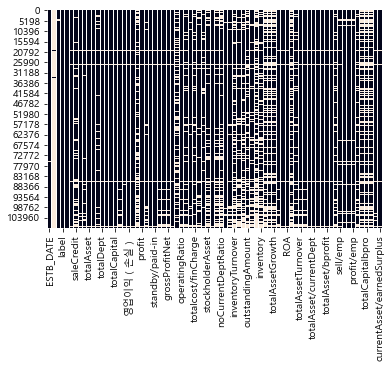

In [40]:
# 시각화

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.heatmap(allcop.isnull(), cbar = False)

<AxesSubplot:>

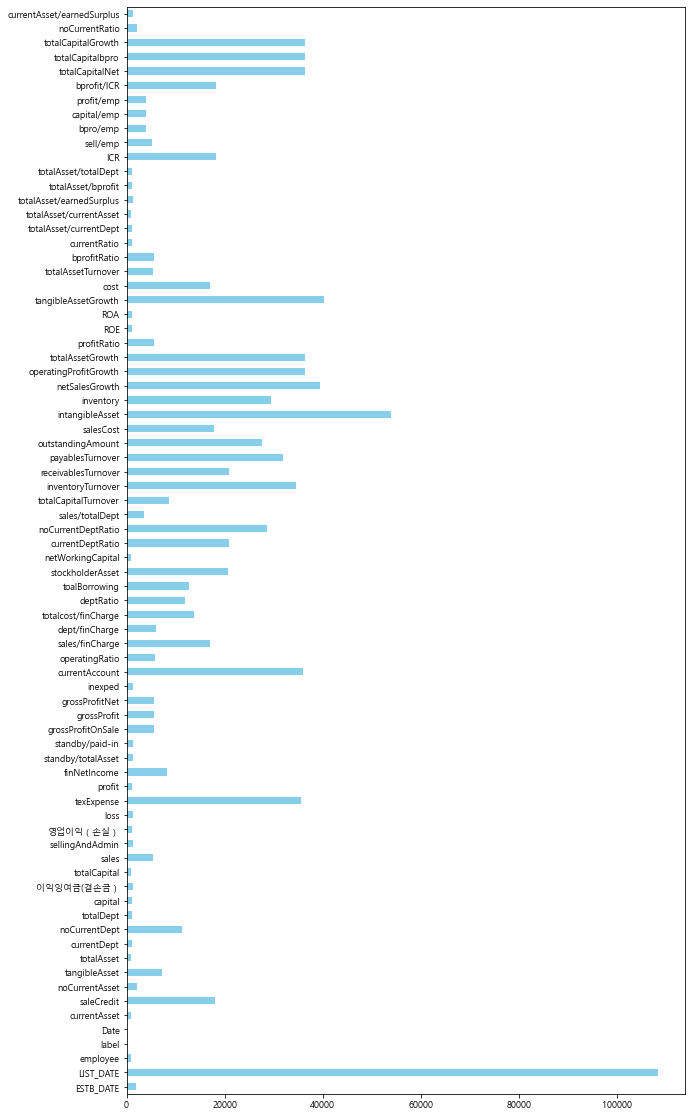

In [41]:
plt.rc('font', size=9) 
allcop.isnull().sum().plot.barh(figsize=(10,20),color = 'skyblue')

<AxesSubplot:>

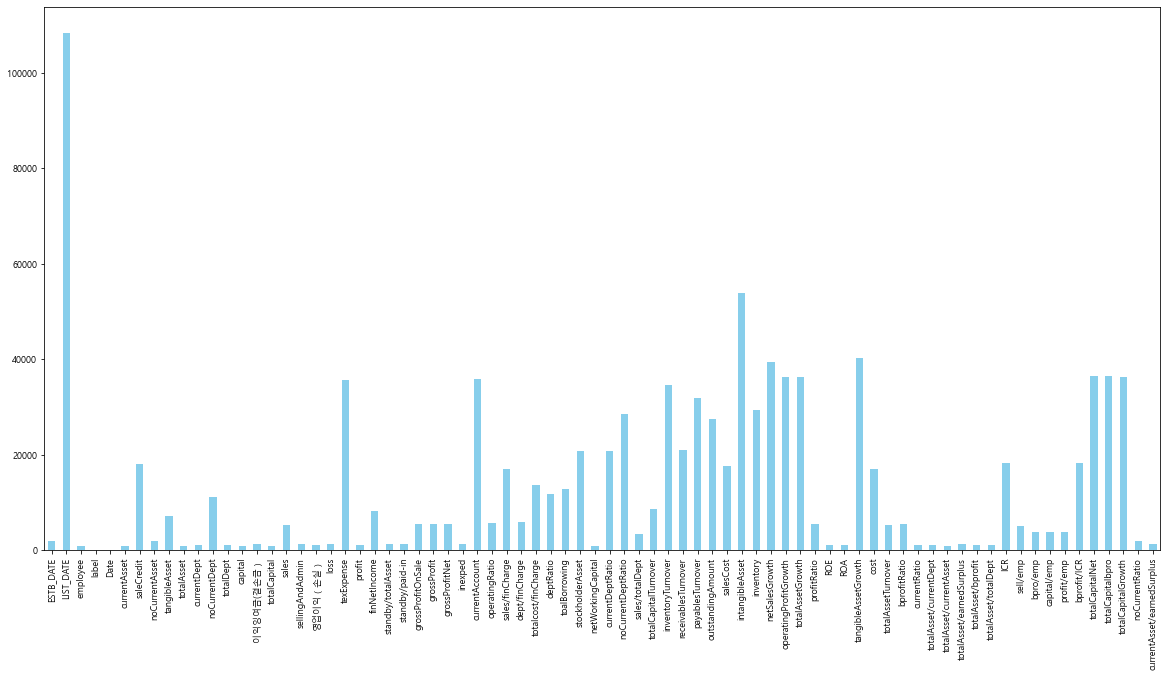

In [42]:
plt.rc('font', size=9) 
allcop.isnull().sum().plot.bar(figsize=(20,10),color = 'skyblue')

#### 2. 수치형 vs 범주형 변수

In [44]:
allcop['label'].value_counts()

1    98905
0    10237
Name: label, dtype: int64

In [45]:
# 수치형 데이터

allcop.describe(exclude = ['int'])

,ESTB_DATE,LIST_DATE,employee,label,Date,currentAsset,saleCredit,noCurrentAsset,tangibleAsset,totalAsset,...,sell/emp,bpro/emp,capital/emp,profit/emp,bprofit/ICR,totalCapitalNet,totalCapitalbpro,totalCapitalGrowth,noCurrentRatio,currentAsset/earnedSurplus
count,107167.000000,717.000000,108289.000000,109142.000000,1.091420e+05,1.081430e+05,9.113200e+04,1.071170e+05,1.018980e+05,1.081530e+05,...,1.039620e+05,1.052160e+05,1.052160e+05,1.052160e+05,90921.000000,72701.000000,72683.000000,7.282400e+04,1.070930e+05,1.078510e+05
mean,219.927627,190.100418,62.426119,0.906205,2.019548e+07,1.559555e+07,4.345309e+06,2.002072e+07,1.431236e+07,3.558984e+07,...,2.575138e+05,1.145524e+05,3.627127e+05,2.723170e+04,56.487838,1.865169,3.369693,9.130668e+02,6.663594e+02,-9.765433e+01
std,137.038929,139.643825,160.280163,0.291545,1.137009e+04,4.427457e+07,2.230116e+07,5.802346e+07,4.736083e+07,9.544234e+07,...,1.104704e+06,2.165616e+06,3.194812e+06,2.875318e+06,1671.956858,25.694053,24.340964,1.842636e+05,1.506909e+05,4.011175e+04
min,3.000000,4.000000,0.000000,0.000000,2.018013e+07,-2.719290e+05,-5.421180e+05,-1.964740e+05,-4.939030e+05,-3.793700e+04,...,-5.678862e+06,-8.514408e+07,-2.886529e+04,-3.183783e+08,-294887.786000,-3266.323000,-3320.311000,-2.681187e+03,-2.694073e+07,-3.052247e+06
25%,112.000000,75.000000,7.000000,1.000000,2.018123e+07,3.493444e+06,6.949922e+05,3.220908e+06,1.051310e+06,1.290780e+07,...,3.532792e+04,-1.369859e+03,7.304598e+03,-5.456093e+03,0.130000,-0.721000,-0.245000,-3.211447e+00,3.580200e+01,-1.031500e+00
50%,199.000000,152.000000,30.000000,1.000000,2.019123e+07,8.256922e+06,2.144162e+06,9.714268e+06,6.726104e+06,2.037449e+07,...,7.221788e+04,1.404137e+04,2.222222e+04,9.015759e+03,2.148000,2.114000,2.999000,4.288755e+00,1.049590e+02,4.169100e+01
75%,290.000000,300.000000,67.000000,1.000000,2.020123e+07,1.670381e+07,4.868394e+06,1.951774e+07,1.468635e+07,3.668912e+07,...,1.661013e+05,5.420311e+04,7.500000e+04,3.977658e+04,8.687000,7.014000,7.828500,1.946191e+01,2.286010e+02,9.461300e+01
max,1629.000000,559.000000,16310.000000,1.000000,2.022063e+07,5.369207e+09,4.158548e+09,1.002787e+10,1.001807e+10,1.595357e+10,...,8.514408e+07,4.245776e+08,2.489720e+08,4.075220e+08,50281.809000,427.792000,244.262000,4.844467e+07,4.000000e+07,1.059169e+07
